# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Part 1. Northern and Southern cities

### EDA

In [40]:
df = pd.read_csv(r'lecture_notebooks\water.csv', index_col = 0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [41]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [42]:
df.shape

(61, 4)

Text(0, 0.5, 'Mortality per 100000 people')

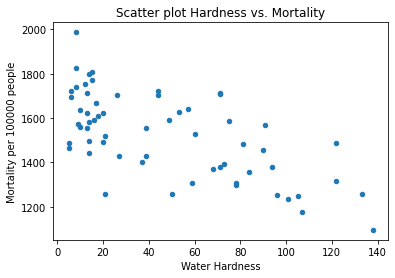

In [43]:
df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness vs. Mortality')
plt.xlabel('Water Hardness')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

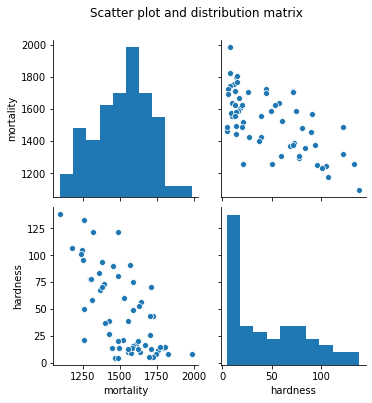

In [44]:
sns.pairplot(df).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

Mortality is heavily right-skewed. Results may be affected.

In [53]:
df['hardness_log'] = np.log(df['hardness'])
df.head()

,location,town,mortality,hardness,hardness_log
1,South,Bath,1247,105,4.653960
2,North,Birkenhead,1668,17,2.833213
3,South,Birmingham,1466,5,1.609438
4,North,Blackburn,1800,14,2.639057
5,North,Blackpool,1609,18,2.890372


In [54]:
df.describe()

,mortality,hardness,hardness_log
count,61.000000,61.000000,61.000000
mean,1524.147541,47.180328,3.446907
std,187.668754,38.093966,0.980487
min,1096.000000,5.000000,1.609438
25%,1379.000000,14.000000,2.639057
50%,1555.000000,39.000000,3.663562
75%,1668.000000,75.000000,4.317488
max,1987.000000,138.000000,4.927254


Text(0, 0.5, 'Mortality per 100000 people')

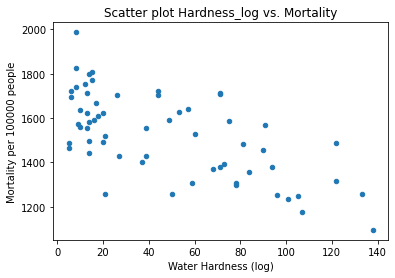

In [55]:
df.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness_log vs. Mortality')
plt.xlabel('Water Hardness (log)')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.0, 'Hardness distribution')

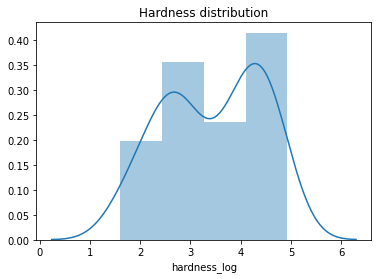

In [56]:
ax = sns.distplot(df.hardness_log)
ax.set_title('Hardness distribution')

The distribution of `hardness_log` is less skewed but is bimodal. We keep the `hardness` variable for further analysis.

In [57]:
# Pearson correlation coefficient matrix
df.corr()

,mortality,hardness,hardness_log
mortality,1.000000,-0.654849,-0.611580
hardness,-0.654849,1.000000,0.937728
hardness_log,-0.611580,0.937728,1.000000


In [58]:
# Kendall correlation coefficient matrix
df.corr(method='kendall')

,mortality,hardness,hardness_log
mortality,1.000000,-0.453753,-0.453753
hardness,-0.453753,1.000000,1.000000
hardness_log,-0.453753,1.000000,1.000000


### Modelling

In [89]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)

In [90]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           7.83e-06
Time:                        22:55:22   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [91]:
print('R2: ', results.rsquared)
print('Coefficients: ')
print(results.params)

R2:  0.3967890100912279
Coefficients: 
const       1668.972298
hardness      -3.131671
dtype: float64


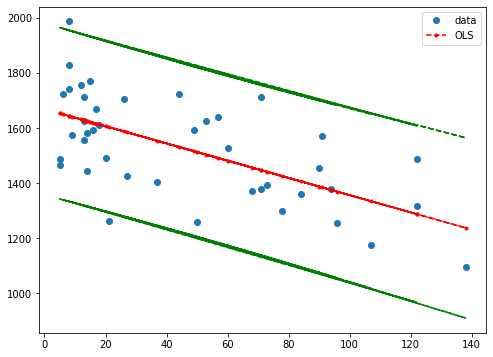

In [96]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

Text(0, 0.5, 'Model Resuduals')

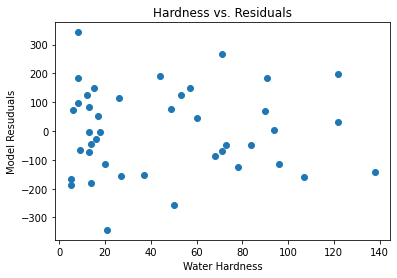

In [75]:
# остатки
plt.scatter(X_const.iloc[:, 1], results.resid) # hardness vs. residuals
plt.title('Hardness vs. Residuals')
plt.xlabel('Water Hardness')
plt.ylabel('Model Resuduals')

## Part 2. Northern cities

### EDA

In [77]:
df_n = df[df['location'] == 'North']
df_n.head()

,location,town,mortality,hardness,hardness_log
2,North,Birkenhead,1668,17,2.833213
4,North,Blackburn,1800,14,2.639057
5,North,Blackpool,1609,18,2.890372
6,North,Bolton,1558,10,2.302585
7,North,Bootle,1807,15,2.708050


In [78]:
df_n.describe()

,mortality,hardness,hardness_log
count,35.000000,35.000000,35.000000
mean,1633.600000,30.400000,3.074398
std,136.936911,26.134494,0.831609
min,1378.000000,6.000000,1.791759
25%,1557.500000,12.500000,2.524928
50%,1637.000000,17.000000,2.833213
75%,1718.000000,44.000000,3.784190
max,1987.000000,94.000000,4.543295


In [80]:
df_n.shape

(35, 5)

Text(0, 0.5, 'Mortality per 100000 people')

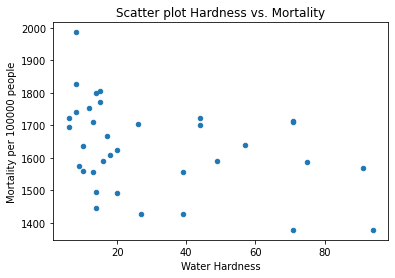

In [81]:
df_n.plot(kind='scatter', x='hardness', y='mortality')
plt.title('Scatter plot Hardness vs. Mortality')
plt.xlabel('Water Hardness')
plt.ylabel('Mortality per 100000 people')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

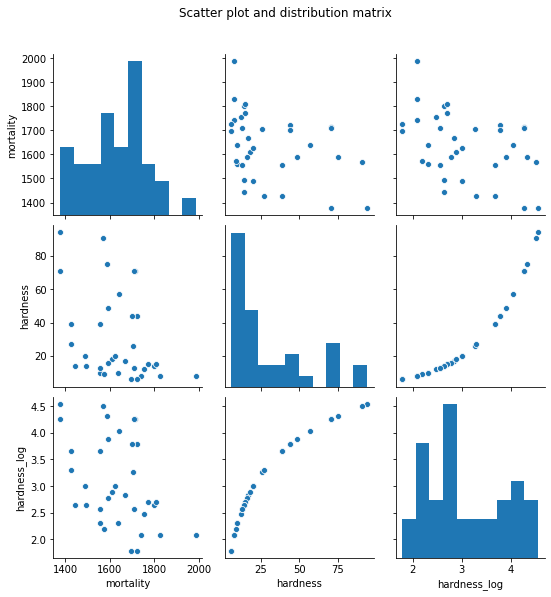

In [82]:
sns.pairplot(df_n).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

In [83]:
# Pearson correlation coefficient matrix
df_n.corr()

,mortality,hardness,hardness_log
mortality,1.000000,-0.368598,-0.412467
hardness,-0.368598,1.000000,0.949981
hardness_log,-0.412467,0.949981,1.000000


In [84]:
# Kendall correlation coefficient matrix
df_n.corr(method='kendall')

,mortality,hardness,hardness_log
mortality,1.000000,-0.283058,-0.283058
hardness,-0.283058,1.000000,1.000000
hardness_log,-0.283058,1.000000,1.000000


### Modelling

In [98]:
X = df_n[['hardness']]
y = df_n['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)

In [99]:
model_n = sm.OLS(y_train, X_const)
results_n = model_n.fit()
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0316
Time:                        22:57:12   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

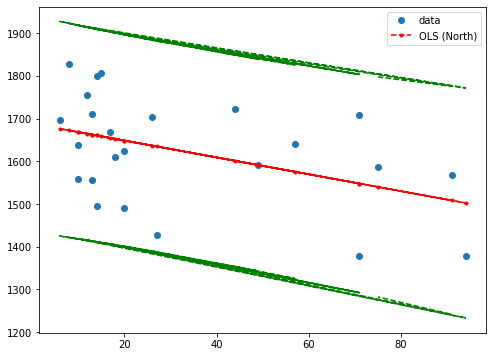

In [103]:
prstd, iv_l, iv_u = wls_prediction_std(results_n)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results_n.fittedvalues, 'r--.', label="OLS (North)")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

Text(0, 0.5, 'Model Resuduals')

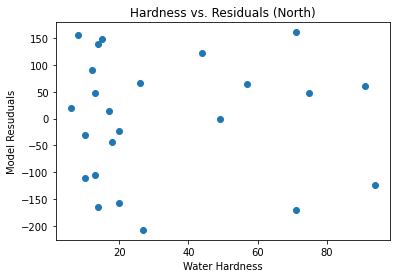

In [104]:
# остатки
plt.scatter(X_const.iloc[:, 1], results_n.resid) # hardness vs. residuals
plt.title('Hardness vs. Residuals (North)')
plt.xlabel('Water Hardness')
plt.ylabel('Model Resuduals')

## Part 3. Southern cities

### EDA